# Lab | Feature Extraction

In [16]:
# For this lab, we will be using the same dataset we used in the previous labs. 
# We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

# Instructions
# 1. Open the categoricals variable we created before.
# categoricals = data.select_dtypes(np.object)
# categoricals.head()
# 2. Plot all the categorical variables with the proper plot. What can you see?
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# 4. Plot time variable. Can you extract something from it?

In [21]:
# 1. Open the categoricals variable we created before.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 2. Find all of the categorical data. Save it in a categorical_df variable.
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

new_columns = []
for col in customer_df.columns:
    new_columns.append(col.lower().replace(' ', '_'))
    
customer_df.columns = new_columns
categorical_df = customer_df.select_dtypes(object)
print(categorical_df.shape)
categorical_df.head()


(9134, 16)


,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [23]:
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

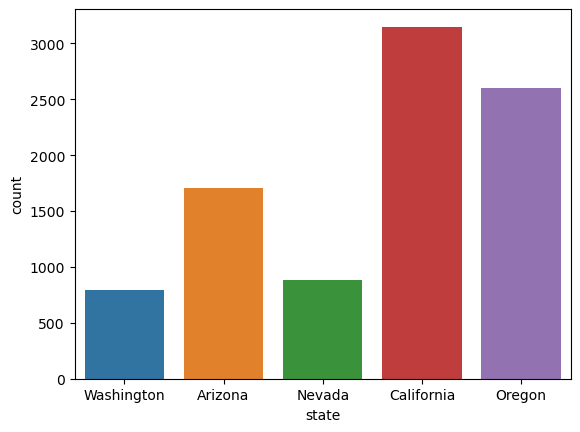

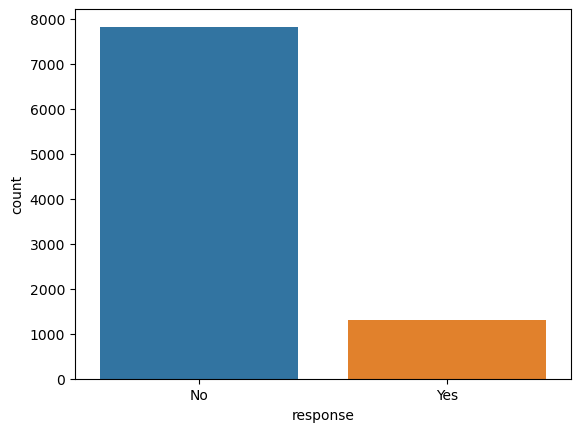

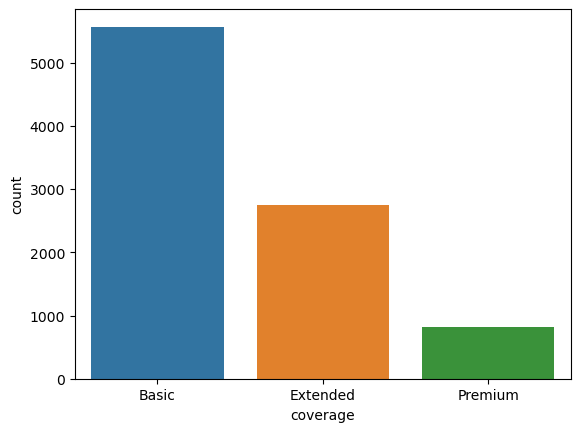

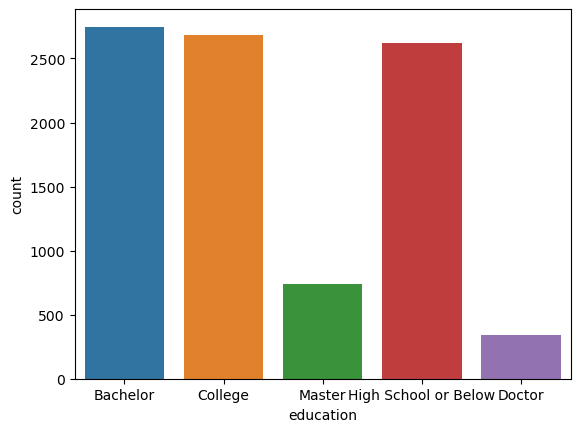

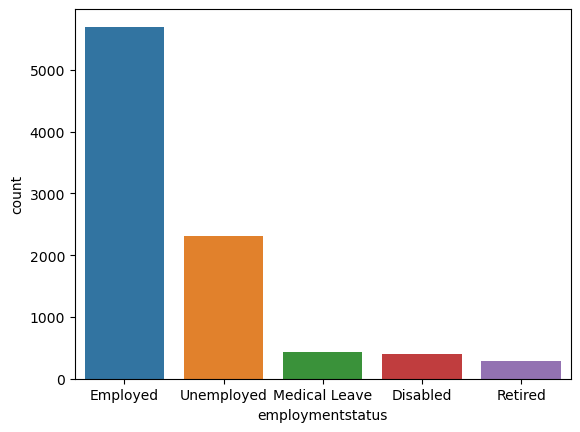

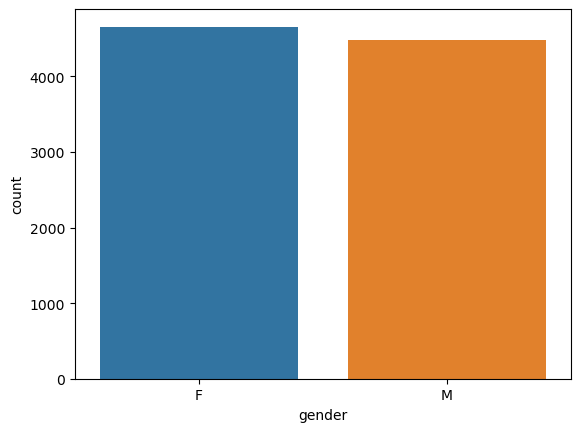

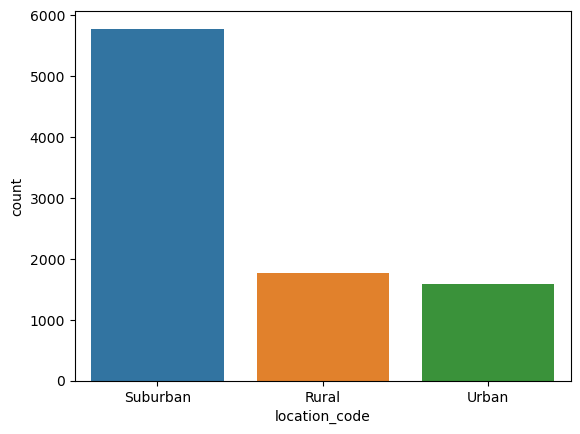

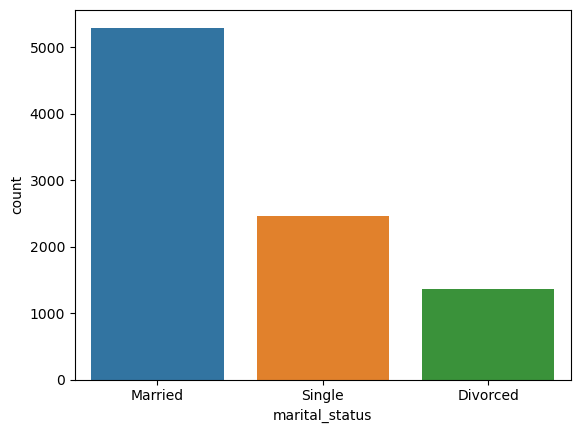

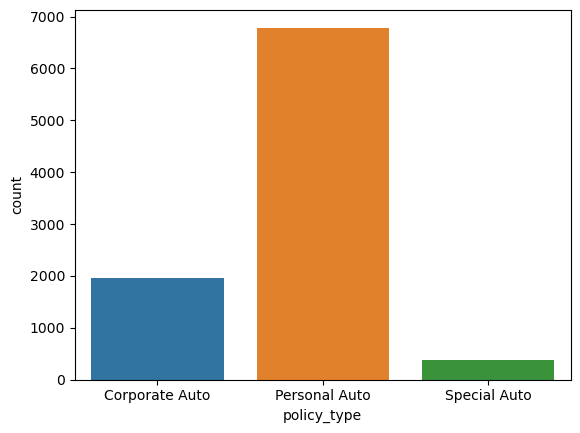

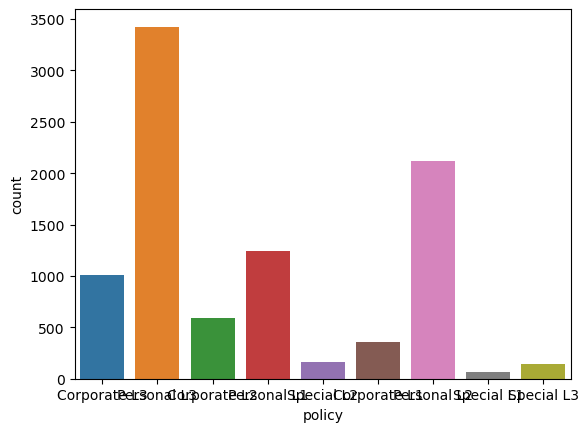

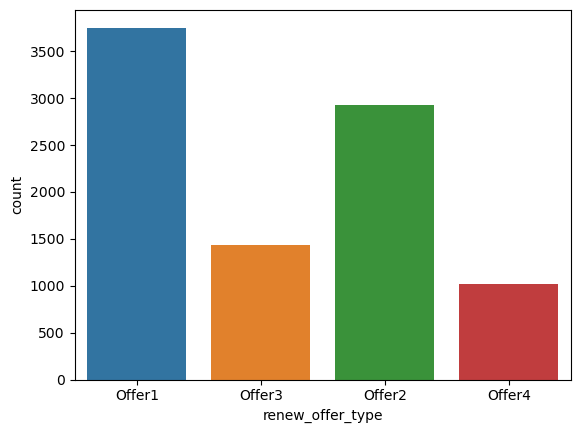

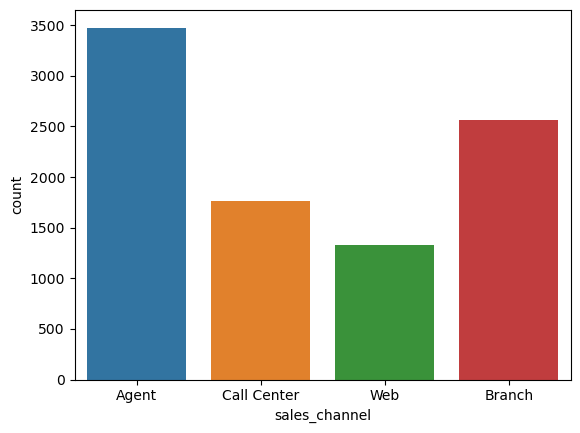

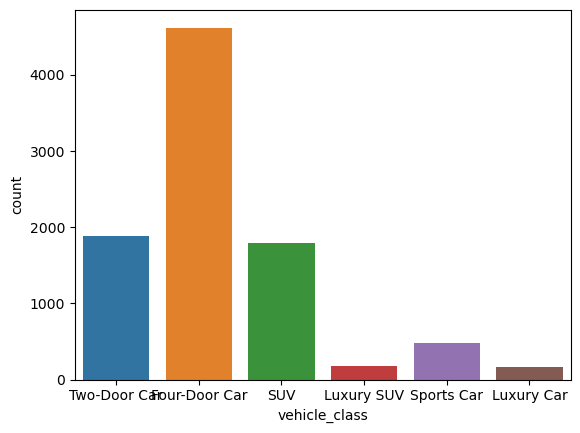

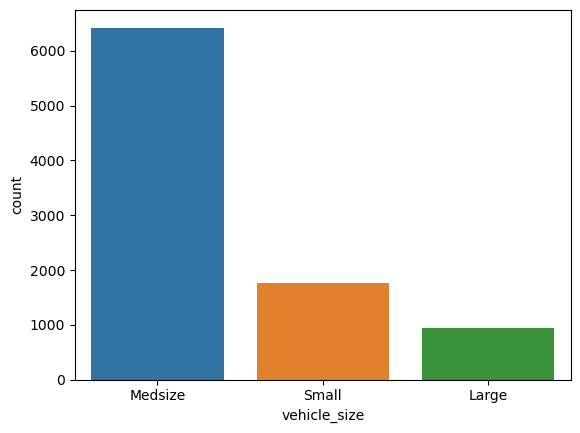

In [24]:
# 2. Plot all the categorical variables with the proper plot. What can you see?
cols_to_plot = ['state', 'response', 'coverage', 'education','employmentstatus', 'gender', 'location_code', 'marital_status','policy_type', 'policy', 'renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size']
for i, col in enumerate(cols_to_plot):
    plt.figure(i)
    sns.countplot(x=col, data=categorical_df)

In [25]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

for col in ['policy', 'policy_type']:
    unique_values = categorical_df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values in policy_type: ['Corporate Auto' 'Personal Auto' 'Special Auto']


In [26]:
#The information in 'policy' and 'policy_type' are redundant. The column 'policy' should be dropped as
# it contains the same information as 'policy_type', but with more categories.

In [27]:
# 4. Plot time variable. Can you extract something from it?
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [ ]:
# customer_df.set_index('effective_to_date', inplace=True)
sns.lineplot(data=customer_df, x='effective_to_date', y='total_claim_amount')
plt.xlabel('Date')
plt.ylabel('Total Claim Amount')
plt.show()